In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from gammapy.data import DataStore
from astropy.coordinates import SkyCoord
from astropy.time import Time
from agn_pipe.query import  get_exclusion_regions, query_datastore
from agn_pipe.analysis.spectral_analysis import SpectralAnalysis
import matplotlib.pyplot as plt


In [90]:
c = SkyCoord.from_name("Crab")
fname = "/home/obriens/DataAnalysis/Veritas/Gammapy/dl3_fullenclosure_moderate2tel_runwise/"
ra = c.ra.deg
dec = c.dec.deg
search_cone = 2.0
tstart = Time("2013-01-01T00:00:00")
tstop = Time("2013-03-01T00:00:00")

# tstart = Time("2021-08-23T00:00:00") # 59449
# tstop = Time("2022-01-10T00:00:00") # 59589

obs = query_datastore(fname, ra, dec, tstart= tstart, tstop = tstop, ele_limit=70)
print (len(obs))
obs

26


[66660,
 66733,
 66556,
 65950,
 66789,
 66533,
 66732,
 65951,
 66557,
 66788,
 66678,
 65777,
 66002,
 66730,
 65779,
 66534,
 66786,
 66113,
 66625,
 66112,
 66003,
 66731,
 66677,
 65778,
 66787,
 66658]

In [91]:
# ds = DataStore.from_dir("/home/obriens/DataAnalysis/Veritas/Gammapy/dl3_fullenclosure_moderate2tel_runwise/")
# ds.info

In [92]:
myspec = SpectralAnalysis(fname,ra, dec, source_name="Crab", point_like=False, obs_ids=obs, tstart=tstart, tstop=tstop) 

Writing to  analysis/e5200f88-2add-447c-8048-362885f82cbf


In [93]:
myspec.scratch_path

PosixPath('analysis/e5200f88-2add-447c-8048-362885f82cbf')

In [94]:
myspec.initialize_analysis()

In [95]:
myspec.setup_model("pwl")

In [96]:
myspec.dataset_stacked.models

In [97]:
myspec.fit_spectrum()

In [98]:
points = myspec.get_spectral_points(e_min = 0.1, e_max = 100)

No dataset contribute in range 46.41588833612777 TeV-100.0 TeV


In [99]:
tab = points.to_table()
tab

e_ref,e_min,e_max,ref_dnde,ref_flux,ref_eflux,norm,norm_err,norm_errn,norm_errp,norm_ul,ts,sqrt_ts,npred,npred_excess,stat,stat_null,is_ul,counts,success,stat_scan,norm_scan
TeV,TeV,TeV,1 / (TeV s cm2),1 / (s cm2),TeV / (s cm2),,,,,,,,,,,,,,,,
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64[1],float64[1],float64,float64,bool,float64[1],bool,float64[11],float64[11]
0.1408079822829465,0.10000000000000002,0.19826887874594562,4.3233256923635e-09,4.348605704535105e-10,5.894094233329007e-11,0.9594322073987303,0.05554869340945519,0.0545591925991916,0.056572707753421984,1.0749292671134882,911.9190518854043,30.197997481379527,330.89910362437587,315.2234191894531,3.096946193181793e-05,911.9190828548662,False,331.0,True,404.51892152492337 .. 1586.7195120765118,0.2 .. 4.999999999999999
0.31291346445318985,0.19826887874594562,0.49384874144349256,5.9386164534161e-10,1.828840078291476e-10,5.35020458734098e-11,0.979875966866208,0.02179207638939347,0.021638223141902203,0.021949210076604865,1.024172509283818,7271.292109252122,85.27187173536255,2160.307994767798,2093.04345703125,18.236342210082512,7289.528451462204,False,2160.0,True,2964.1023040601367 .. 10256.329920148117,0.2 .. 4.999999999999999
0.695378448356307,0.49384874144349256,0.9791483623609768,8.157415816041461e-11,4.0520857691062844e-11,2.7123118688252827e-11,1.0942676620244436,0.03373340886295007,0.03339396194895139,0.034076593049275905,1.1631524969626257,4365.666214829846,66.07318832045148,1080.942612653717,1067.1798095703125,0.07755825334834299,4365.743773083193,False,1081.0,True,1778.9699247595363 .. 4354.1793141781345,0.2 .. 4.999999999999999
1.3787190525970046,0.9791483623609768,1.9413464793123976,1.4879273781060565e-11,1.465420674091833e-11,1.9448130492992273e-11,0.9967504808619673,0.04685415107702432,0.04612873170639436,0.047585431110245935,1.0933973429780957,2094.3582849188433,45.76415939268243,459.06066281628455,455.89093017578125,2.398278834879875,2096.756563753723,False,459.0,True,719.0286529184918 .. 2188.774980531896,0.2 .. 4.999999999999999
3.0638870628004056,1.9413464793123976,4.8355118643842525,2.043850183370816e-12,6.162941049222041e-12,1.765351432463349e-11,0.9486047012835704,0.06636168045900953,0.06483409716398718,0.06790628789212878,1.0875338944347521,951.3916733921494,30.84463767646087,207.02794620627472,205.71751403808594,0.9856866377332096,952.3773600298827,False,207.0,True,309.44224273313205 .. 1072.049636615601,0.2 .. 4.999999999999999
6.808786689291953,4.8355118643842525,9.587315155141829,2.8074781293305615e-13,1.3654975094773423e-12,8.949533732312382e-12,0.6787036808252371,0.1201651332234319,0.11319214587528884,0.1273481698718107,0.9481584173608602,169.68362855772864,13.026266869588103,32.00617286477929,31.950794219970703,0.4988011012632043,170.18242965899185,False,32.0,True,33.386874263723755 .. 279.63463715184787,0.2 .. 4.999999999999999
15.1309676988898,9.587315155141829,23.8801144846124,3.856414482234779e-14,5.742706379506838e-13,8.123697133721717e-12,0.5123630500887018,0.17241387753242066,0.15383048597521395,0.19207511754947887,0.9377095728899951,39.38055483852251,6.275392803524135,8.988878039343222,8.916680335998535,0.18025262583941437,39.56080746436192,False,9.0,True,5.975457231697309 .. 115.51706185327973,0.2 .. 4.999999999999999
33.292893045989814,23.8801144846124,46.415888336127765,5.429639076753895e-15,1.2507995109860617e-13,4.017146448152108e-12,0.6731179220225145,0.6731192737661098,0.4700356117880901,0.9138838575914324,3.032583248113526,4.629958012460774,2.1517337224807287,0.9999919361633913,0.9999919533729553,6.502576255229542e-11,4.629958012525799,False,1.0,True,1.0214671851513035 .. 8.845588935433295,0.2 .. 4.999999999999999


<Axes: xlabel='Energy [$\\mathrm{TeV}$]', ylabel='dnde [$\\mathrm{TeV^{-1}\\,s^{-1}\\,cm^{-2}}$]'>

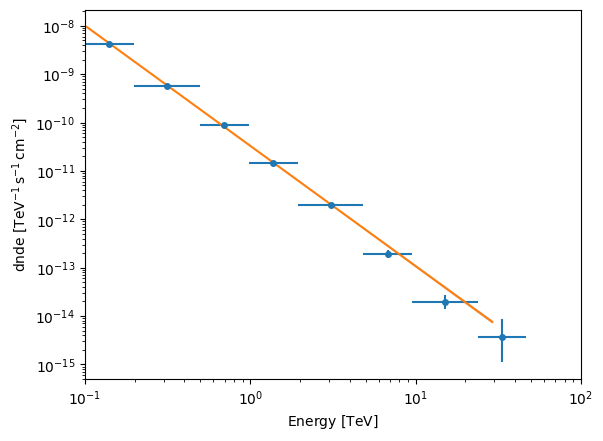

In [100]:
from astropy import units as u
fig, ax = plt.subplots()
points.plot(sed_type="dnde")
myspec.model.spectral_model.plot([0.1 * u.TeV, 30 * u.TeV])
myspec.model.spectral_model.plot_error([0.1 * u.TeV, 30 * u.TeV])


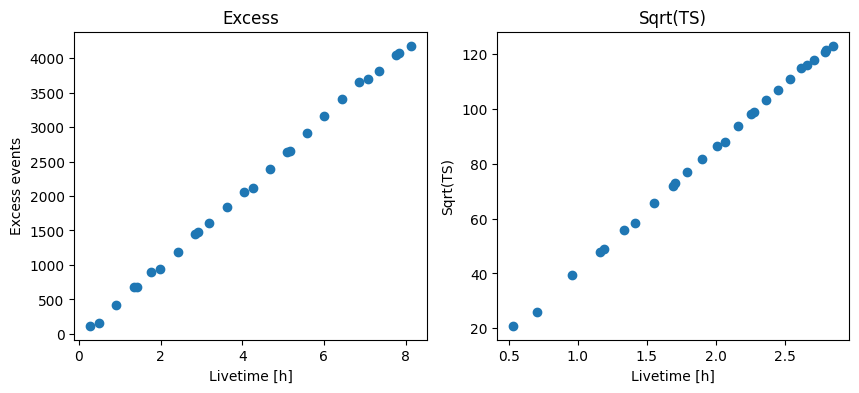

In [101]:
import numpy as np

fig, (ax_excess, ax_sqrt_ts) = plt.subplots(figsize=(10, 4), ncols=2, nrows=1)
ax_excess.plot(
    myspec.info_table["livetime"].to("h"),
    myspec.info_table["excess"],
    marker="o",
    ls="none",
)

ax_excess.set_title("Excess")
ax_excess.set_xlabel("Livetime [h]")
ax_excess.set_ylabel("Excess events")

ax_sqrt_ts.plot(
    np.sqrt(myspec.info_table["livetime"].to("h")),
    myspec.info_table["sqrt_ts"],
    marker="o",
    ls="none",
)

ax_sqrt_ts.set_title("Sqrt(TS)")
ax_sqrt_ts.set_xlabel("Livetime [h]")
ax_sqrt_ts.set_ylabel("Sqrt(TS)")
plt.show()

In [102]:
print (f"Total significance: {myspec.info_table['sqrt_ts'][-1]:0.2f}")

Total significance: 123.04


In [103]:
my_lc_daily = myspec.run_lightcurve(1)
my_lc_weekly = myspec.run_lightcurve(7)
# my_lc_monthly = myspec.run_lightcurve(28)
# my_lc_yearly = myspec.run_lightcurve(365)


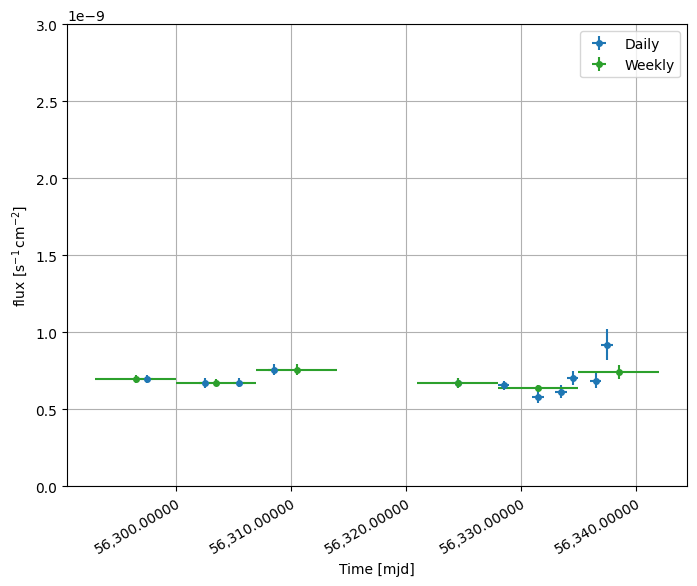

In [104]:
plt.figure(figsize=(8, 6))
my_lc_daily.plot(marker="o", sed_type="flux",time_format="mjd", label = "Daily")
my_lc_weekly.plot(marker="o", color = "C2", sed_type="flux",time_format="mjd", label = "Weekly")
# my_lc_monthly.plot(marker="o", color = "C3",  sed_type="flux",time_format="mjd", label = "Monthly")
plt.yscale('linear')
# plt.ylim(-0.1e-10, 1e-10)
plt.ylim(0, 0.3e-8)

plt.grid()

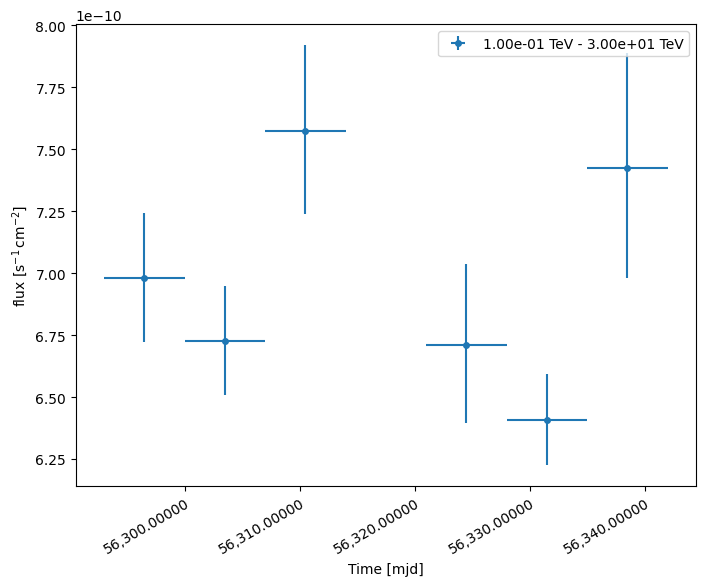

In [105]:
plt.figure(figsize=(8, 6))
my_lc_weekly.plot(marker="o", sed_type="flux",time_format="mjd")
plt.yscale('linear')

In [106]:
# plt.figure(figsize=(8, 6))
# my_lc_monthly.plot(marker="o", sed_type="flux",time_format="mjd")
# plt.yscale('linear')

In [125]:
tab_lc = my_lc_daily.to_table(format="lightcurve")

In [108]:
my_lc_weekly.to_table(format="lightcurve")

time_min,time_max,e_ref,e_min,e_max,ref_dnde,ref_flux,ref_eflux,norm,norm_err,norm_errn,norm_errp,norm_ul,ts,sqrt_ts,npred,npred_excess,stat,stat_null,is_ul,counts,success,stat_scan,norm_scan
,,TeV,TeV,TeV,1 / (TeV s cm2),1 / (s cm2),TeV / (s cm2),,,,,,,,,,,,,,,,
float64,float64,float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],"float64[1,26]","float64[1,26]",float64[1],float64[1],bool[1],"float64[1,26]",bool[1],"float64[1,500]","float64[1,500]"
56293.00077759259,56300.00077759259,1.7320508075688776,0.10000000000000002,30.000000000000004,8.438361235703617e-12,6.810796650730623e-10,1.9526847020464102e-10,1.025039866180544,0.03814689030993146,0.03769382759036255,0.03861016221236779,1.1033227663202243,2502.7368509379307,50.02736102312345,239.7060940003541 .. nan,232.510009765625 .. nan,53.781986037972615,2556.5188369759035,False,236.0 .. nan,True,2470.742333202278 .. 136638.83075592105,0.010000000000000004 .. 100.00000000000004
56300.00077759259,56307.00077759259,1.7320508075688776,0.10000000000000002,30.000000000000004,8.438361235703617e-12,6.810796650730623e-10,1.9526847020464102e-10,0.9876819859373975,0.032130611045654914,0.03179348162354909,0.032471166768942974,1.053341020698474,3230.0948561134715,56.83392346225511,nan .. nan,nan .. nan,81.41749648061416,3311.5123525940858,False,nan .. nan,True,3199.683247034639 .. 185102.26372768,0.010000000000000004 .. 100.00000000000004
56307.00077759259,56314.00077759259,1.7320508075688776,0.10000000000000002,30.000000000000004,8.438361235703617e-12,6.810796650730623e-10,1.9526847020464102e-10,1.112250517270573,0.04984191169596485,0.04912278201828468,0.05057073169621895,1.2149213326584833,1664.7749246198694,40.80165345448477,nan .. nan,nan .. nan,38.89810403724204,1703.6730286571114,False,nan .. nan,True,1652.9586354018757 .. 86086.37444174645,0.010000000000000004 .. 100.00000000000004
56321.00077759259,56328.00077759259,1.7320508075688776,0.10000000000000002,30.000000000000004,8.438361235703617e-12,6.810796650730623e-10,1.9526847020464102e-10,0.9853366999614664,0.046963353594577206,0.046243190395741256,0.04769255078024326,1.0822355228801102,1529.5119406428264,39.10897519295061,nan .. nan,nan .. nan,45.67790512369791,1575.1898457665243,False,nan .. nan,True,1521.6488156627315 .. 86566.89576802385,0.010000000000000004 .. 100.00000000000004
56328.00077759259,56335.00077759259,1.7320508075688776,0.10000000000000002,30.000000000000004,8.438361235703617e-12,6.810796650730623e-10,1.9526847020464102e-10,0.9409046452534616,0.027173201621679834,0.02691976354947876,0.027427425945480446,0.9962603749375596,4310.381578076481,65.65349631266015,nan .. nan,nan .. nan,128.87065942942635,4439.252237505907,False,nan .. nan,True,4263.9874379333705 .. 247924.66834963975,0.010000000000000004 .. 100.00000000000004
56335.00077759259,56342.00077759259,1.7320508075688776,0.10000000000000002,30.000000000000004,8.438361235703617e-12,6.810796650730623e-10,1.9526847020464102e-10,1.0901802975223014,0.06660171830300772,0.06528638692559907,0.06793340344346377,1.2287686826150435,1344.2711022018598,36.664302832617174,nan .. 17.515674236917953,nan .. 17.09217071533203,137.88994183321086,1482.1610440350705,False,nan .. 28.0,True,1390.409779282792 .. 47410.14848562966,0.010000000000000004 .. 100.00000000000004


In [109]:
# my_lc_monthly.to_table(format="lightcurve")

In [110]:
# my_lc_yearly.to_table(format="lightcurve")

In [111]:
# my_lc_yearly = myspec.run_lightcurve(365)


In [126]:
# tab_lc = my_lc_weekly.to_table(format="lightcurve")

In [127]:
tab_lc

time_min,time_max,e_ref,e_min,e_max,ref_dnde,ref_flux,ref_eflux,norm,norm_err,norm_errn,norm_errp,norm_ul,ts,sqrt_ts,npred,npred_excess,stat,stat_null,is_ul,counts,success,stat_scan,norm_scan
,,TeV,TeV,TeV,1 / (TeV s cm2),1 / (s cm2),TeV / (s cm2),,,,,,,,,,,,,,,,
float64,float64,float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],"float64[1,26]","float64[1,26]",float64[1],float64[1],bool[1],"float64[1,26]",bool[1],"float64[1,500]","float64[1,500]"
56297.00077759259,56298.00077759259,1.7320508075688776,0.10000000000000002,30.000000000000004,8.438361235703617e-12,6.810796650730623e-10,1.9526847020464102e-10,1.025039866180544,0.03814689030993146,0.03769382759036255,0.03861016221236779,1.1033227663202243,2502.7368509379307,50.02736102312345,239.7060940003541 .. nan,232.510009765625 .. nan,53.781986037972615,2556.5188369759035,False,236.0 .. nan,True,2470.742333202278 .. 136638.83075592105,0.010000000000000004 .. 100.00000000000004
56302.00077759259,56303.00077759259,1.7320508075688776,0.10000000000000002,30.000000000000004,8.438361235703617e-12,6.810796650730623e-10,1.9526847020464102e-10,0.986247819743896,0.044682611048299285,0.044036128596325774,0.045336672865347975,1.0782766109415856,1588.606985777776,39.85733289844889,nan .. nan,nan .. nan,40.97645829224275,1629.5834440700187,False,nan .. nan,True,1574.730226437035 .. 96281.19783152014,0.010000000000000004 .. 100.00000000000004
56305.00077759259,56306.00077759259,1.7320508075688776,0.10000000000000002,30.000000000000004,8.438361235703617e-12,6.810796650730623e-10,1.9526847020464102e-10,0.9892128885517734,0.046237487610715236,0.0455338081382882,0.046948519186607744,1.0845677466603532,1641.4899776046555,40.51530547342146,nan .. nan,nan .. nan,40.43893091941153,1681.928908524067,False,nan .. nan,True,1624.9530205976039 .. 88821.06589615987,0.010000000000000004 .. 100.00000000000004
56308.00077759259,56309.00077759259,1.7320508075688776,0.10000000000000002,30.000000000000004,8.438361235703617e-12,6.810796650730623e-10,1.9526847020464102e-10,1.112250517270573,0.04984191169596485,0.04912278201828468,0.05057073169621895,1.2149213326584833,1664.7749246198694,40.80165345448477,nan .. nan,nan .. nan,38.89810403724204,1703.6730286571114,False,nan .. nan,True,1652.9586354018757 .. 86086.37444174645,0.010000000000000004 .. 100.00000000000004
56324.00077759259,56325.00077759259,1.7320508075688776,0.10000000000000002,30.000000000000004,8.438361235703617e-12,6.810796650730623e-10,1.9526847020464102e-10,0.9853366999614664,0.046963353594577206,0.046243190395741256,0.04769255078024326,1.0822355228801102,1529.5119406428264,39.10897519295061,nan .. nan,nan .. nan,45.67790512369791,1575.1898457665243,False,nan .. nan,True,1521.6488156627315 .. 86566.89576802385,0.010000000000000004 .. 100.00000000000004
56328.00077759259,56329.00077759259,1.7320508075688776,0.10000000000000002,30.000000000000004,8.438361235703617e-12,6.810796650730623e-10,1.9526847020464102e-10,0.9651790126491088,0.04313286795396631,0.042519946065954356,0.043767494952821555,1.0542396765606725,1655.4937402594214,40.687759096065015,nan .. nan,nan .. nan,42.25156677150247,1697.7453070309239,False,nan .. nan,True,1640.1710045904183 .. 100645.72869292423,0.010000000000000004 .. 100.00000000000004
56331.00077759259,56332.00077759259,1.7320508075688776,0.10000000000000002,30.000000000000004,8.438361235703617e-12,6.810796650730623e-10,1.9526847020464102e-10,0.848753698330321,0.05552430485948645,0.054361494526818,0.05668403677550576,0.9643122045938886,794.2794362283637,28.18296358136177,nan .. nan,nan .. nan,17.971217584788004,812.2506538131516,False,nan .. nan,True,778.1386381101015 .. 54332.17186535903,0.010000000000000004 .. 100.00000000000004
56333.00077759259,56334.00077759259,1.7320508075688776,0.10000000000000002,30.000000000000004,8.438361235703617e-12,6.810796650730623e-10,1.9526847020464102e-10,0.9025251273020604,0.06140202449485854,0.060055

In [128]:
# my_lc_yearly.plot(sed_type="flux",time_format="mjd")
# # my_lc_yearly.plot_ts_profiles()
# plt.yscale('linear')

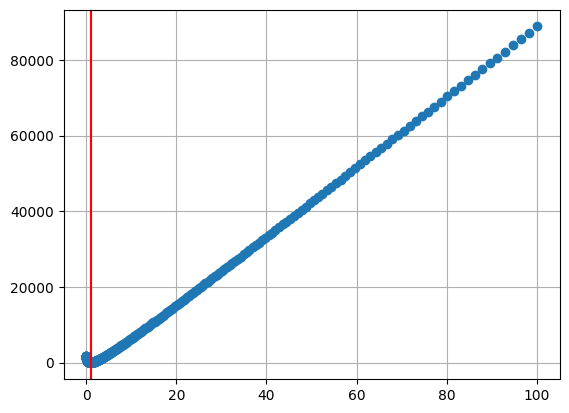

In [129]:
from scipy.interpolate import interp1d
indx = 2

plt.plot(tab_lc[indx]["norm_scan"][0], tab_lc[indx]["stat_scan"][0], "C0o")
inter = interp1d(tab_lc[indx]["norm_scan"][0], tab_lc[indx]["stat_scan"][0], kind = "quadratic")
norm_range = np.linspace(0.201,4.999)
plt.plot(norm_range,inter(norm_range), "C0--")
amin = np.argmin(inter(norm_range))

plt.axvline(tab_lc[indx]['norm'])
plt.axvline(norm_range[amin], color = "r")
plt.grid()

In [172]:
from agn_pipe.analysis.variability_analysis import get_edges, get_optimal_binning, get_variability_index, get_variability_probability

In [124]:
help(get_edges)

Help on function get_edges in module agn_pipe.analysis.variability_analysis:

get_edges(tab_lc: astropy.table.table.Table) -> Tuple[numpy.ndarray, numpy.ndarray, List[List[int]]]
    Get the edges of the light curves.

    Parameters:
    -----------
    tab_lc: astropy Table of light curve measurements

    Returns:
    --------
    likelihood: numpy array, likelihood of the model for each number of edges
    dof: numpy array, degrees of freedom for each number of edges
    edges: List of List of integers, edges of the light curves



In [177]:
likelihood, dof, edges = get_edges(tab_lc)

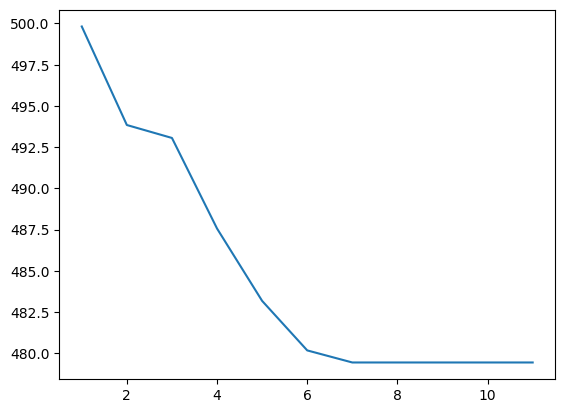

In [178]:
plt.plot(dof, likelihood)

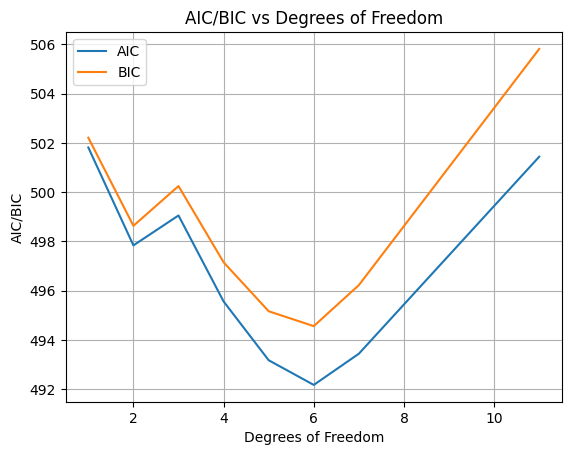

-0.37336008948597055
5.878532132419309


In [183]:
# # get the AIC
aic = 2 * dof + likelihood
# # get the BIC
# bic = np.log(len(tab_lc)) * dof - 2 * likelihood

bic = np.array([ nb * np.log(len(tab_lc)) + likelihood[-nb] for nb in dof])
# aic = np.array([ 2 * nb + likelihood[-nb] for nb in dof])
# aix = np.array([ 2 * nb + 2*likelihood[-nb] for nb in dof])

plt.plot(dof, aic, label = "AIC")
plt.plot(dof, bic, label = "BIC")
plt.legend()

plt.xlabel('Degrees of Freedom')
plt.ylabel('AIC/BIC')
plt.title('AIC/BIC vs Degrees of Freedom')
plt.grid(True)
plt.show()
print (aic[0] - aic[-1])
print (aic[0] - aic[7])

In [184]:
likelihood

array([479.44297416, 479.44297416, 479.44297416, 479.44297416,
       479.44297416, 480.1751078 , 483.17717338, 487.56444202,
       493.05648087, 493.84129884, 499.81633425])

In [149]:
help(get_optimal_binning)

Help on function get_optimal_binning in module agn_pipe.analysis.variability_analysis:

get_optimal_binning(tab_lc: astropy.table.table.Table, method: Optional[str] = 'aic') -> Tuple[int, List[int]]
    Get the optimal model for the light curves.

    Parameters:
    -----------
    tab_lc: astropy Table of light curve measurements
    method: str, optional, default "aic", method to use for model selection

    Returns:
    --------
    opt_binning: List of integers, optimal binning of the light curves
    likelihood: float, likelihood of the optimal model



In [150]:
opt_bins, ll = get_optimal_binning(tab_lc)

In [161]:
mjd = (tab_lc["time_max"] + tab_lc["time_min"])/2
flux = (tab_lc["ref_flux"] * tab_lc["norm"])[:,0]
flux_err = (tab_lc["ref_flux"] * tab_lc["norm_err"])[:,0]
flux_err

2.5981071275866965e-11
3.043241776736559e-11
3.1491412575725804e-11
3.3946312524488886e-11
3.1985785136902444e-11
2.9376919259727996e-11
3.781647495711364e-11
4.181967027776622e-11
4.466472187640692e-11
5.0219630487652454e-11
1.0158481415885232e-10


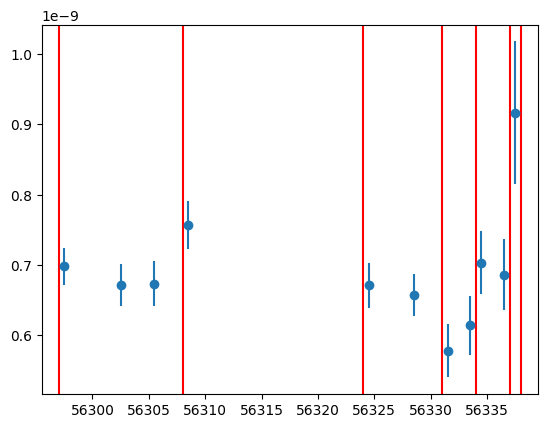

In [166]:
plt.errorbar(mjd, flux, yerr = flux_err, fmt = "o")
for b in opt_bins[:-1]:
    plt.axvline(tab_lc["time_min"][b], color = "r")
plt.axvline(tab_lc["time_min"][opt_bins[-1]], color = "r")
plt.axvline(tab_lc["time_max"][opt_bins[-1]], color = "r")



In [167]:
from astropy.stats import bayesian_blocks

In [170]:
blocks = bayesian_blocks(mjd, flux, flux_err, fitness="measures")

20.404076754452035 10


0.025654308451594738

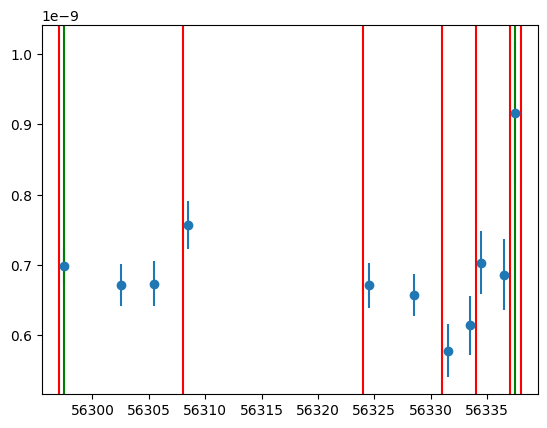

In [175]:
plt.errorbar(mjd, flux, yerr = flux_err, fmt = "o")
for b in opt_bins[:-1]:
    plt.axvline(tab_lc["time_min"][b], color = "r")
plt.axvline(tab_lc["time_min"][opt_bins[-1]], color = "r")
plt.axvline(tab_lc["time_max"][opt_bins[-1]], color = "r")


for b in blocks:
    plt.axvline(b, color = "g")


ts_var, dof = get_variability_index(tab_lc)
print (ts_var, dof)
get_variability_probability(ts_var, dof)